In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=12)

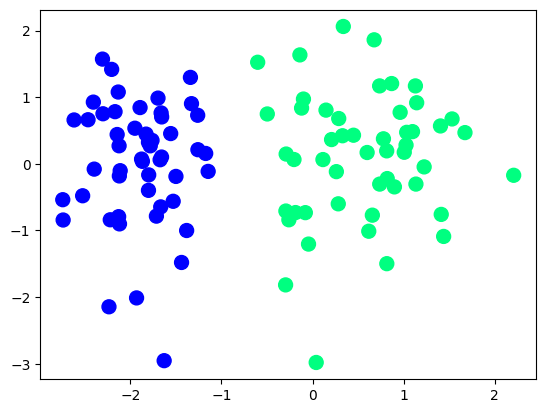

In [26]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [27]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [28]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        # chosing random value between 0 and numbe of rows in X
        j = np.random.randint(0,len(X))
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [29]:
intercept_,coef_ = perceptron(X,y)
print(intercept_)
print(coef_)

2.888071794685159
[4.02620035 0.03923737]


In [30]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [31]:
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b

### Line From Perception Trick

(-3.0, 2.0)

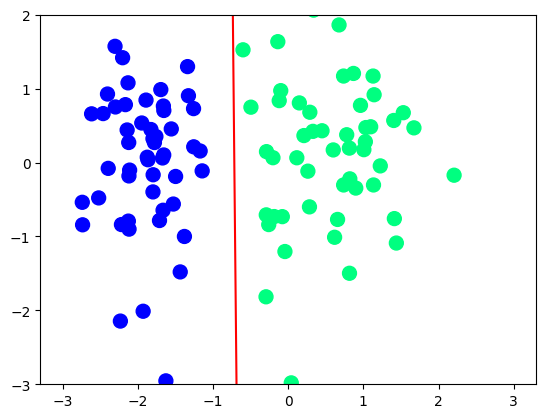

In [32]:
plt.plot(x_input,y_input,color='red')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
# Finding m and b using sklearn
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

c:\Users\chinu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [34]:
print(lor.coef_)
print(lor.intercept_)

[[9.84347236 0.64707356]]
[7.77097647]


In [35]:
m1 = -(lor.coef_[0][0] / lor.coef_[0][1])
b1 = -(lor.intercept_[0] / lor.coef_[0][1])

In [36]:
y_sk_input = m1*x_input+b1

In [77]:
# Finding m and b using gradient descent
def GD(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(2000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr * (np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [75]:
coef_GD, intercept_GD = GD(X,y)

(3,)
(100, 3)


In [45]:
m_GD = -(coef_GD[0] / coef_GD[1])
b_GD = -(intercept_GD / coef_GD[1])

y_gd_input = m_GD*x_input + b_GD

##### Red line is from gradient descent 
##### Blue line is from Sklearn
##### Green line is from perception trick

(-3.0, 2.0)

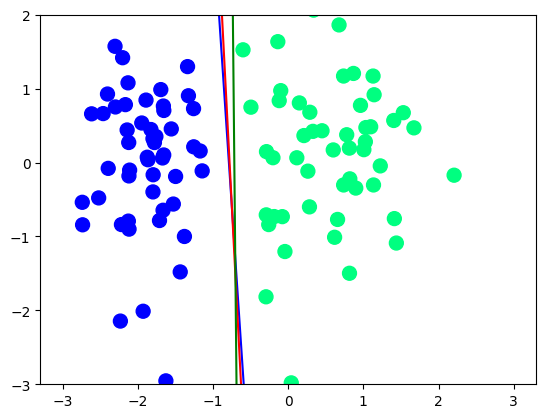

In [ ]:
plt.plot(x_input,y_sk_input,color='blue')
plt.plot(x_input,y_gd_input,color='red')
plt.plot(x_input,y_input,color='green')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)